<a href="https://colab.research.google.com/github/rvssridatta/ML/blob/main/25_WebAdOptimization_UpperBoundConfidence_ReienforcementLearning/25_WebAdOptimization_UpperBoundConfidence_ReienforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load Dataset from Local Directory

from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset.csv


In [3]:
#import data

dataset = pd.read_csv('dataset.csv')
print(dataset.shape)
print(dataset.head(5))

(10000, 10)
   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0


In [6]:
#upper confidence bound
import math
observations = 10000
no_of_Ads = 10
ads_selected = []
numbers_of_selections_of_each_ads = [0]*no_of_Ads
sums_of_rewards_of_each_ads = [0]*no_of_Ads
total_reward = 0
for n in range(0,observations):
  ad = 0
  max_upper_bound = 0
  for i in range(0,no_of_Ads):
    if(numbers_of_selections_of_each_ads[i] > 0):
      average_reward = sums_of_rewards_of_each_ads[i]/numbers_of_selections_of_each_ads[i]
      delta_i = math.sqrt(3/2*math.log(n+1)/numbers_of_selections_of_each_ads[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i

    ads_selected.append(ad)
    numbers_of_selections_of_each_ads[ad] = numbers_of_selections_of_each_ads[ad] + 1
    reward = dataset.values[n,ad]
    sums_of_rewards_of_each_ads[ad] = sums_of_rewards_of_each_ads[ad] + reward
    total_reward = total_reward + reward

print('Rewards by ads =', sums_of_rewards_of_each_ads)
print('total rewards by ucb = ', total_reward)
print('ads selected by each round:',ads_selected)


Rewards by ads = [5570, 335, 93, 419, 15402, 5, 26, 332, 45, 11]
total rewards by ucb =  22238
ads selected by each round: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 6, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 7, 8, 8, 0, 0, 0, 0, 4, 5, 5, 7, 8, 9, 0, 0, 0, 3, 3, 3, 6, 6, 8, 9, 0, 0, 2, 2, 4, 4, 4, 7, 8, 9, 0, 0, 0, 0, 0, 5, 5, 7, 8, 9, 0, 1, 1, 1, 1, 1, 6, 6, 8, 9, 0, 0, 2, 2, 2, 5, 5, 7, 8, 8, 0, 0, 0, 3, 3, 3, 6, 7, 7, 9, 0, 0, 0, 0, 4, 4, 4, 7, 7, 7, 0, 0, 2, 2, 2, 5, 6, 7, 7, 9, 0, 1, 1, 3, 3, 5, 6, 7, 8, 8, 0, 0, 0, 0, 4, 4, 6, 7, 7, 9, 0, 1, 1, 3, 3, 5, 5, 7, 8, 9, 0, 1, 1, 1, 1, 1, 1, 7, 7, 7, 0, 1, 2, 2, 4, 4, 6, 7, 8, 9, 0, 1, 1, 3, 3, 5, 6, 7, 8, 9, 0, 0, 2, 2, 4, 5, 6, 7, 8, 8, 0, 0, 0, 3, 4, 4, 6, 7, 7, 7, 0, 1, 1, 1, 4, 4, 6, 7, 8, 8, 0, 1, 1, 1, 4, 4, 4, 7, 7, 7, 0, 1, 1, 1, 1, 1, 1, 7, 7, 9, 0, 1, 

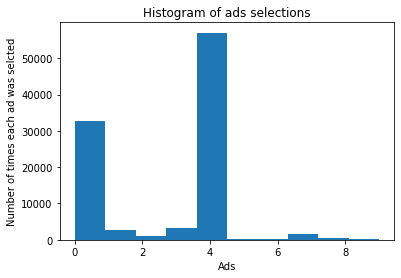

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selcted')
plt.show()